In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt
from IPython.display import HTML, Latex, Math

In [2]:
params = {'font.size':12, 'legend.fontsize':'medium', 'axes.labelsize':'large', 'axes.titlesize':'large'}
plt.rcParams.update(params)

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Mostra/Nascondi celle</a>.''')

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
# Valentina Guarino, mat. 978477

## <span style="color:red">  ESERCITAZIONE 3</span>

### Plain Vanilla option pricing

Lo scopo dell'esercitazione è valutare attraverso tecniche numeriche MonteCarlo il valore che dovrebbe avere una call-option o una put-option in un caso semplice di European option, confrontandole con i valori analitici ottenuti dai risultati di Black-Scholes. Si definisce call-option il diritto che ha il compratore (l'holder) di comprare un certo bene da un venditore (il writer) ad un prezzo pattuito $K$; l'acquisto sarà per lui vantaggioso soltanto se il prezzo del bene al tempo $T$ in cui avviene l'acquisto, $S(T)$, sia maggiore del prezzo $K$ pattuito in precedenza. Ciò avviene per un valore della call 

$$C[S(T),T] = max(0, S(T)-K)$$

La put-option è invece il diritto dell'holder di vendere al writer un certo bene ad un tempo $T$ ad un prezzo pattuito $K$. Il guadagno per l'holder in questo caso ci sarà se il prezzo del bene al tempo $T$ è minore del prezzo pattuito $K$, ovvero per un valore della put pari a

$$P[S(T),T] = max(0, K-S(T))$$

Per valutare i loro valori al tempo dell'accordo $t<T$ bisogna moltiplicarli per $e^{-rT}$, che equivale all'interesse che una banca avrebbe garantito con un deposito al tempo $t$.
Nella European option inoltre solo il writer ha l'obbligo di vendita/acquisto.

L'andamento dell'asset dei prezzi $S(T)$ è regolato da fluttuazioni dovute sia ad un contributo deterministico, dato dal drift di crescita $\mu$ che esprime il tasso di crescita medio dell'asset, sia ad un contributo stocastico, dato dalla volatilità $\sigma$ che esprime la forza delle fluttuazioni statistiche del prezzo. Si può allora esprimere l'andamento dei prezzi come un processo di Itō detto Moto Browniano Geometrico, per cui $$d\ln{S(T)} = (\mu - \frac{1}{2}\sigma^2)dt + \sigma dW(t)$$ dove $W(t)$ è un processo di Wiener. Inoltre, scegliendo incrementi $dW(t)$ indipendenti e distribuiti secondo una distribuzione normale, si ottiene una formula ricorsiva per l'asset dei prezzi: 

$$S(t_{i+1}) = S(t_i)e^{(\mu-\frac{1}{2}\sigma^2)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}}$$ 

con $Z_N$ variabili random distribuite secondo una distribuzione gaussiana.

Vengono confrontati i valori ottenuti per una call e una put simulando numericamente l'andamento dei prezzi sia nel caso discreto $S(t_{i+1})$ sia nel caso diretto al tempo finale $T$, $S(T)$, con le soluzione analitiche trovate da Black-Scholes (dove il drift $\mu$ viene sostituito dal tasso d'interesse senza rischio $r$):
- European Call Option

$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$

- European Put Option

$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

con

$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

dove $d_2 = d_1 - \sigma\sqrt{T-t}$, e
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
cumulativa di una gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$
Si utilizzano i seguenti valori per i parametri:
- Asset dei prezzi a $t=0$: $S(0)=100$
- Tempo di consegna $T=1$
- Prezzo pattuito $K=100$
- Tasso d'interesse senza rischio $r=0.1$
- Volatilità $\sigma=0.25$

#### Caso diretto: $S(T)= S(0)e^{(r-\frac{1}{2}\sigma^2)T+\sigma Z_{i} \sqrt{T}}$

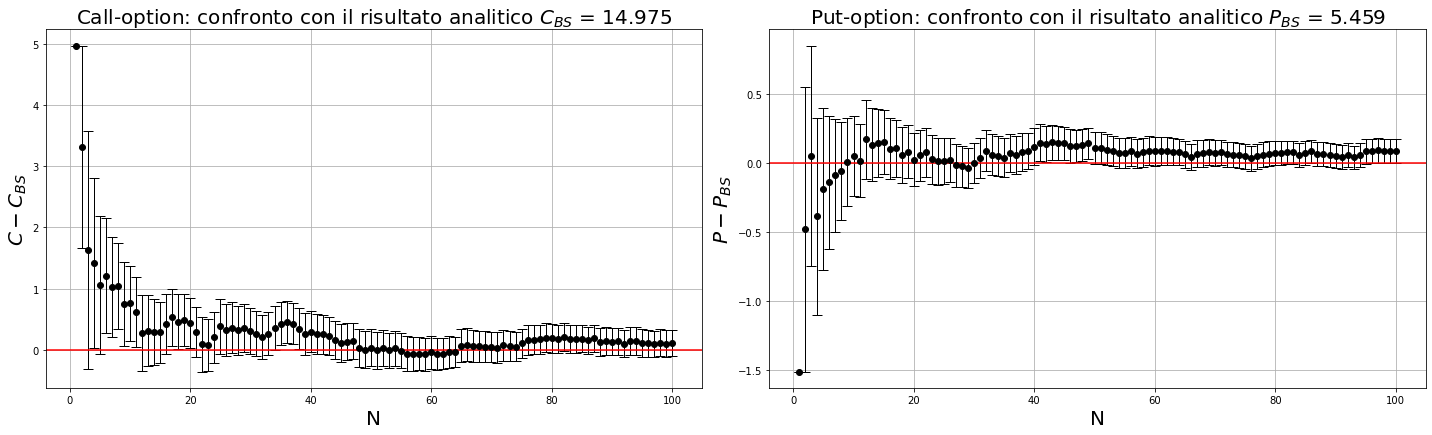

In [5]:
plt.figure(figsize=(20,14))
plt.subplot(2,2,1)
#Plot per la call option
N, C, std = np.loadtxt("Risultati/call_dir.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N,C-14.975790778311286,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.axhline(y=0,color="red")
plt.xlabel("N", fontsize = 20)
plt.ylabel("$C - C_{BS}$", fontsize = 20)
plt.title("Call-option: confronto con il risultato analitico $C_{BS}$ = 14.975", fontsize = 20)
plt.grid(True)

plt.subplot(2,2,2)
#Plot per la put option
N, P, std = np.loadtxt("Risultati/put_dir.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N,P-5.4595325819072364,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.axhline(y=0,color="red")
plt.xlabel("N", fontsize = 20)
plt.ylabel("$P - P_{BS}$", fontsize = 20)
plt.title("Put-option: confronto con il risultato analitico $P_{BS}$ = 5.459", fontsize = 20)
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5)
plt.show()

#### Caso discreto: $S(t_{i+1}) = S(t_i)e^{(r-\frac{1}{2}\sigma^2)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}}$

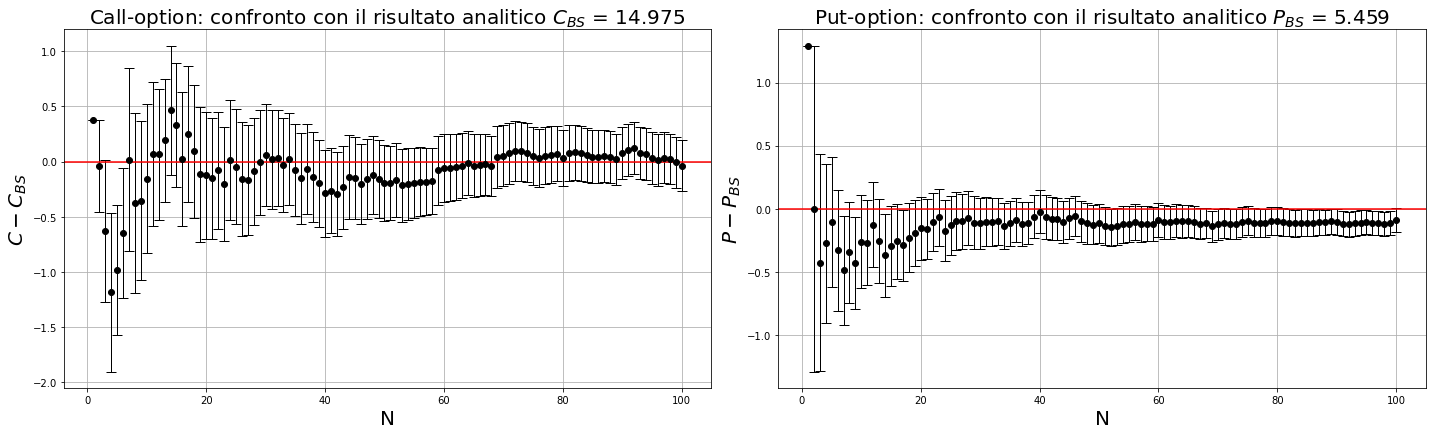

In [6]:
plt.figure(figsize=(20,14))
plt.subplot(2,2,1)
#Plot per la call option
N, C, std = np.loadtxt("Risultati/call_discr.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N,C-14.975790778311286,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.axhline(y=0,color="red")
plt.xlabel("N", fontsize = 20)
plt.ylabel("$C - C_{BS}$", fontsize = 20)
plt.title("Call-option: confronto con il risultato analitico $C_{BS}$ = 14.975", fontsize = 20)
plt.grid(True)

plt.subplot(2,2,2)
#Plot per la put option
N, P, std = np.loadtxt("Risultati/put_discr.dat", usecols = (0,1,2), unpack = True)
plt.errorbar(N,P-5.4595325819072364,yerr=std, fmt = "ko", capsize = 5, elinewidth = 1)
plt.axhline(y=0,color="red")
plt.xlabel("N", fontsize = 20)
plt.ylabel("$P - P_{BS}$", fontsize = 20)
plt.title("Put-option: confronto con il risultato analitico $P_{BS}$ = 5.459", fontsize = 20)
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9,hspace=0.5)
plt.show()

In entrambi i casi si è utilizzato il blocking method per il calcolo delle incertezze statistiche. 

Per entrambi i campionamenti si vede la convergenza del risultato entro $1\sigma$ a quello ottenuto analiticamente da Black-Scholes.